<a href="https://colab.research.google.com/github/shashi545/shashidhar/blob/master/potholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# tensorflow
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
from google.colab import drive
drive.mount('/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive/


In [0]:
import os
os.chdir('/drive/My Drive/Classroom/')


In [0]:
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

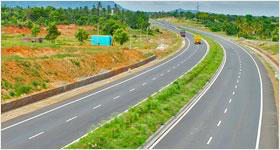

In [0]:
Image.open('./normal/1.6.jpg')

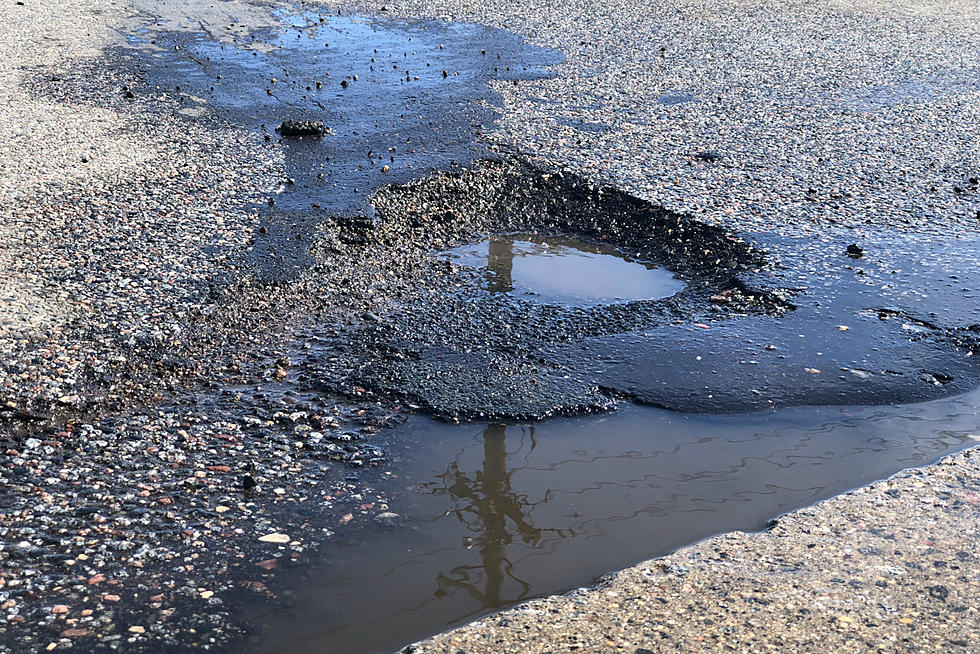

In [0]:
Image.open('./potholes/1.Pothole.jpg')

In [0]:
ls

'Batch 27 Morning 10 AM - 11.30 AM'/      normal/
 cnn_mnist/                               pothole-detection-dataset.zip
'Copy of pothole-detection-dataset.zip'   potholes/
'New folder (3)'/


In [0]:
normal='./normal'
image_size = 224

## **Image preprocessing**

In [0]:
image_size = 224
path = os.path.join(normal,'1.6.jpg')
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (image_size, image_size)).flatten()
np.asarray(img), len(np.asarray(img))

(array([240, 222, 232, ..., 229, 219, 250], dtype=uint8), 50176)

In [0]:
li=[]
for images in os.listdir(normal):
    path = os.path.join(normal, images) 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()
    li.append(img)
    
    

In [0]:
pothole='./potholes'

In [0]:
li1=[]
for images in os.listdir(pothole):
    path = os.path.join(pothole, images) 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()
    li1.append(img)

In [0]:
len(li1),len(li)

(332, 349)

In [0]:

for i in li : 
    li1.append(i) 
  


In [0]:
li1[0]

array([215, 220, 227, ...,  96,  99,  86], dtype=uint8)

In [0]:
len(li1)

681

In [0]:
y=[]
for i in range(0,332):
  a=0
  y.append(a)

In [0]:
len(y)

332

In [0]:
for i in range(0,349):
  a=1
  y.append(a)
len(y)

681

In [0]:
x=li1

In [0]:
y=np.array(y)

In [0]:
y.shape

(681,)

In [0]:
x=np.array(x)

In [0]:
x.shape

(681, 50176)

## **Splitting the train and test images**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((544, 50176), (137, 50176), (544,), (137,))

## **Building the CNN Model**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization

In [0]:
# Rehape in Traning data (X)
x_train_reshape = x_train.reshape(-1,224,224,1)
x_test_reshape = x_test.reshape(-1,224,224,1)

x_train_reshape.shape,x_test_reshape.shape

((544, 224, 224, 1), (137, 224, 224, 1))

In [0]:
def conv_neural_network():
    model=Sequential()
    # Convolutional layer
    model.add(Conv2D(input_shape=(224,224,1),filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten
    model.add(Flatten())
    # Neural network
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))# input connected to output
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
conv_nn = conv_neural_network()
print(conv_nn.summary())
# initializing tensorboard
tfb = TensorBoard('cnn_mnist')
# Training Model 
history = conv_nn.fit(x=x_train_reshape,y=y_train,batch_size=30,epochs=30,callbacks=[tfb],validation_data=[x_test_reshape,y_test])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 30)      300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 218, 218, 60)      45060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 60)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 30)      16230     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 84270)             0         
_________________________________________